In [1]:
import pandas as pd
import numpy as np

In [26]:
df_2021 = pd.read_csv('../data/dengue/hdx/doh-epi-dengue-cases-iloilo.csv')
df_2021.head()

,loc,cases,deaths,date,Region,year
0,ILOILO CITY,19,0.0,10/01/2016,REGION VI-WESTERN VISAYAS,2016
1,ILOILO CITY,23,0.0,17/01/2016,REGION VI-WESTERN VISAYAS,2016
2,ILOILO CITY,31,0.0,24/01/2016,REGION VI-WESTERN VISAYAS,2016
3,ILOILO CITY,26,0.0,31/01/2016,REGION VI-WESTERN VISAYAS,2016
4,ILOILO CITY,10,1.0,07/02/2016,REGION VI-WESTERN VISAYAS,2016


In [27]:
df_2021.drop(columns=['loc', 'deaths', 'year','Region'], inplace=True)

In [28]:
df_2021 = df_2021[['date','cases']]
df_2021.columns = ['ds','y']
df_2021['ds'] = pd.to_datetime(df_2021['ds'], format = "%d/%m/%Y")

In [29]:
df_2022 = pd.read_csv('df_merged_weekly.csv')
df_2022.head()

,Unnamed: 0,ds,y,temp,feels_like,pressure,humidity,precipitation
0,0,2022-01-01,7.0,298.38,299.64,1013.0,87.0,3.14
1,1,2022-01-08,1.0,302.23,308.88,1011.0,68.0,0.00
2,2,2022-01-15,2.0,300.74,304.09,1013.0,58.0,0.00
3,3,2022-01-22,3.0,302.42,309.89,1010.0,63.0,0.00
4,4,2022-01-29,3.0,303.37,308.69,1010.0,64.0,0.42


In [31]:
df_2022_rem = df_2022[['ds','y']]
df_2022_rem['ds'] = pd.to_datetime(df_2022_rem['ds'])

C:\Users\jacob\AppData\Local\Temp\ipykernel_9748\3546642242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_rem['ds'] = pd.to_datetime(df_2022_rem['ds'])


In [32]:
df_all = pd.concat([df_2021, df_2022_rem])
df_all['ds'] = pd.to_datetime(df_all['ds'])

In [33]:
df_all.head()

,ds,y
0,2016-01-10,19.0
1,2016-01-17,23.0
2,2016-01-24,31.0
3,2016-01-31,26.0
4,2016-02-07,10.0


<Axes: xlabel='ds'>

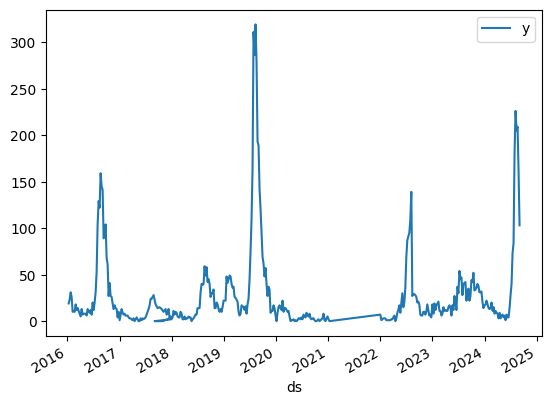

In [34]:
df_all.plot(x='ds', y='y')

22:54:45 - cmdstanpy - INFO - Chain [1] start processing
22:54:45 - cmdstanpy - INFO - Chain [1] done processing


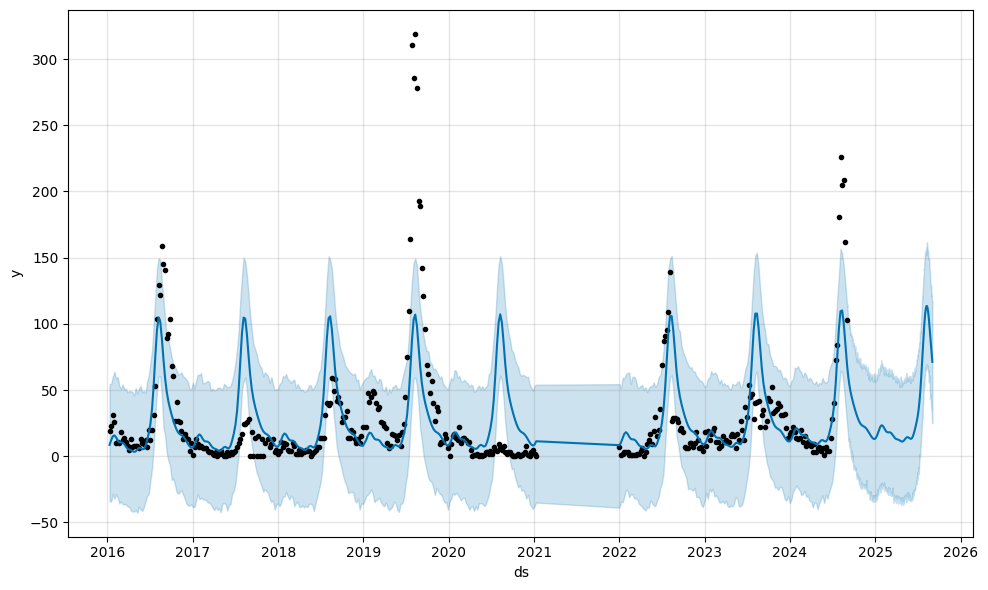

In [35]:
from prophet import Prophet
model = Prophet()
model.fit(df_all)
forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)
fig = model.plot(forecast)

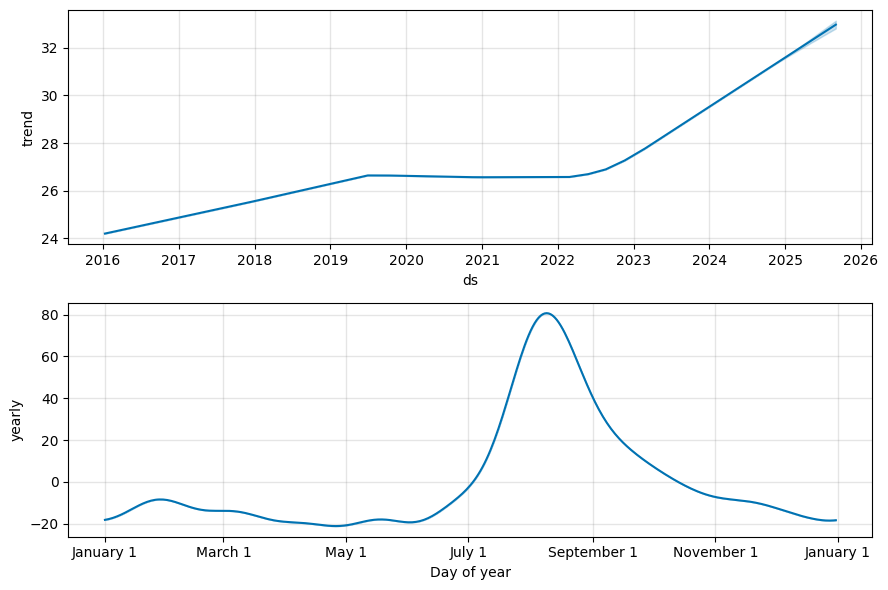

In [36]:
fig = model.plot_components(forecast)